1. What is Boosting in Machine Learning? Explain how it improves weak
- Boosting is an ensemble technique in machine learning that turns **weak learners** into a **strong model** by training them sequentially.

- A weak learner is a model that performs only slightly better than random guessing. In boosting, models are trained one after another, and each new model focuses more on the data points that previous models predicted incorrectly.

Here is how boosting improves weak learners:

- 1. **Sequential learning**
   Each model learns from the mistakes of the previous one, instead of learning independently.

- 2. **Higher weight to errors**
   Misclassified data points are given more importance, so the next model pays extra attention to them.

- 3. **Weighted combination**
   All models are combined into a final prediction, where better-performing models get more influence.

- As a result, multiple simple models together create a highly accurate and robust predictor. Popular boosting algorithms include **AdaBoost**, **Gradient Boosting**, and **XGBoost**.


2. What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
- The key difference lies in **how each method corrects mistakes from previous models**.

**AdaBoost**

* Trains models sequentially by **reweighting data points**.
* Misclassified samples get higher weights, so the next model focuses more on those cases.
* Models are usually simple (often decision stumps).
* Each model’s influence depends on its accuracy.

**Gradient Boosting**

* Trains models sequentially by **learning from residual errors**.
* Each new model fits the gradient of the loss function, basically correcting what the previous models got wrong.
* Works with any differentiable loss function.
* More flexible and powerful, but computationally heavier.

**In short:**
AdaBoost adjusts **sample weights**, while Gradient Boosting fits **errors (gradients)** directly to improve performance.


3. How does regularization help in XGBoost?
- Regularization in **XGBoost** helps control model complexity so it generalizes well instead of overfitting the training data.

Here’s how it helps:

1. **Penalizes complex trees**
   XGBoost adds a regularization term to the objective function that penalizes:

   * Too many leaves in a tree (gamma)
   * Large leaf weights (L1 and L2 regularization)

2. **Controls tree growth**
   By discouraging unnecessary splits, regularization keeps trees smaller and more meaningful.

3. **Improves generalization**
   The model focuses on patterns that truly matter, not noise in the data.

4. **Balances bias and variance**
   Regularization slightly increases bias but significantly reduces variance, leading to more stable predictions on unseen data.

In short, regularization in XGBoost prevents overfitting by keeping trees simple and well-controlled, which improves real-world performance.


4. : Why is CatBoost considered efficient for handling categorical data?
- CatBoost is considered efficient for categorical data because it handles them **natively**, without relying on heavy manual preprocessing like one-hot encoding.

Here’s why that matters:

1. **Built-in categorical encoding**
   CatBoost uses target-based statistics to convert categories into numerical values in a smart way, instead of expanding them into many columns.

2. **Avoids target leakage**
   It applies ordered boosting, where statistics for a data point are calculated using only past data, not the full dataset.

3. **Handles high-cardinality features well**
   Even categories with many unique values are processed efficiently without blowing up feature space.

4. **Less preprocessing, better accuracy**
   You don’t need to engineer encodings manually, and the model often performs better out of the box.

In short, CatBoost saves time, reduces overfitting, and gives strong performance when working with categorical features.


5. What are some real-world applications where boosting techniques are
preferred over bagging methods?
- Boosting is preferred over bagging when you need **high accuracy** and are dealing with **complex patterns**, especially where errors from weak learners can be corrected iteratively. Some real-world applications include:

1. **Fraud detection** – Boosting can catch subtle patterns in transaction data that single models or bagging might miss.
2. **Credit scoring and risk assessment** – Sequential learning helps improve predictions for defaults or loan approvals.
3. **Click-through rate prediction (advertising)** – Gradient Boosting models like XGBoost and LightGBM excel at predicting user behavior.
4. **Customer churn prediction** – Boosting focuses on hard-to-predict cases, improving retention strategies.
5. **Medical diagnosis** – For datasets with imbalanced classes (e.g., rare diseases), boosting handles the minority class better than bagging.
6. **Ranking problems** – Search engines and recommendation systems use boosting (e.g., LambdaMART) for learning-to-rank tasks.

**In short:** boosting is chosen when accuracy and handling of difficult-to-predict instances are more important than model simplicity or speed, which are the strengths of bagging.


6. Write a Python program to:
-  Train an AdaBoost Classifier on the Breast Cancer dataset
- Print the model accuracy


In [1]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")


AdaBoost Classifier Accuracy: 0.9649


7. Write a Python program to:
- Train a Gradient Boosting Regressor on the California Housing dataset
-  Evaluate performance using R-squared score


In [2]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor R-squared Score: {r2:.4f}")


Gradient Boosting Regressor R-squared Score: 0.7756


8.  Write a Python program to:
-  Train an XGBoost Classifier on the Breast Cancer dataset
- Tune the learning rate using GridSearchCV
- Print the best parameters and accuracy


In [4]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier (no use_label_encoder to avoid warning)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Define parameter grid for tuning
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Predict on test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print best parameters and test set accuracy
print("Best Parameters:", grid_search.best_params_)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Test Set Accuracy: 0.9561


9.  Write a Python program to:
-  Train a CatBoost Classifier
- Plot the confusion matrix using seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00
CatBoost Classifier Accuracy: 0.9649


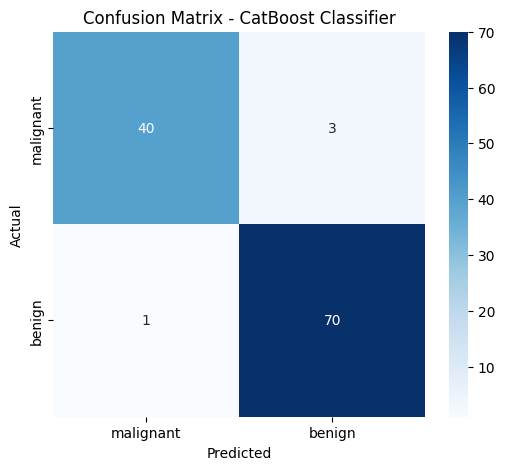

In [6]:
# Install CatBoost
!pip install catboost --quiet

# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost Classifier
model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=4, verbose=0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoost Classifier Accuracy: {accuracy:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()


10.  You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
-  Data preprocessing & handling missing/categorical values
- Choice between AdaBoost, XGBoost, or CatBoost
- Hyperparameter tuning strategy
- Evaluation metrics you'd choose and why
- How the business would benefit from your model

Here’s a structured **step-by-step data science pipeline** for predicting loan defaults using boosting techniques, followed by an example Python code skeleton.

---

### **Step 1: Data Preprocessing**

1. **Handle missing values**

   * For numeric features: impute using median or mean.
   * For categorical features: impute with mode or a special category (`"Missing"`).

2. **Encode categorical features**

   * **CatBoost** can handle categorical features natively (no need for one-hot encoding).
   * For AdaBoost/XGBoost: use one-hot encoding or target encoding.

3. **Handle class imbalance**

   * Options:

     * Use **SMOTE** or **RandomOverSampler** to balance classes.
     * Alternatively, use **class_weight='balanced'** or `scale_pos_weight` in XGBoost.

4. **Split dataset**

   * Train-test split (e.g., 80-20).
   * Optionally, use stratified sampling to preserve class ratios.

---

### **Step 2: Choice of Boosting Algorithm**

* **CatBoost** is ideal here because:

  * Handles categorical features natively.
  * Robust to missing values.
  * Works well on imbalanced datasets with `auto_class_weights='Balanced'`.

---

### **Step 3: Hyperparameter Tuning Strategy**

1. Start with **default parameters** and establish a baseline.
2. Use **GridSearchCV** or **RandomizedSearchCV** to tune:

   * `learning_rate` (0.01–0.3)
   * `depth` (3–8)
   * `iterations` (100–1000)
   * `l2_leaf_reg` (regularization)
   * For XGBoost: `scale_pos_weight` for imbalance.
3. Consider **Bayesian optimization** for faster tuning on large datasets.

---

### **Step 4: Evaluation Metrics**

* Since the dataset is imbalanced:

  * **Precision**: How many predicted defaults are actual defaults.
  * **Recall**: How many actual defaults are captured by the model.
  * **F1-score**: Balance between precision and recall.
  * **ROC-AUC**: Overall discrimination ability of the model.

Accuracy alone is misleading because predicting all customers as non-default could give high accuracy but be useless.

---

### **Step 5: Business Benefits**

* **Reduce loan defaults** by identifying high-risk customers.
* **Optimize lending decisions** and risk-based pricing.
* **Better capital allocation** by focusing on low-risk borrowers.
* **Increase profits** while managing risk exposure.



In [7]:
# Install CatBoost if not installed
!pip install catboost --quiet

# Imports
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from catboost import CatBoostClassifier

# Example: Load your dataset
# df = pd.read_csv('loan_data.csv')
# For demo, let's simulate a small dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, n_classes=2, weights=[0.8,0.2],
                           random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
df['target'] = y

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize CatBoost Classifier
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=4,
    auto_class_weights='Balanced',  # Handles imbalance
    verbose=0,
    random_state=42
)

# Hyperparameter tuning (optional small grid for demo)
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [3, 4, 5],
    'l2_leaf_reg': [1, 3, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

# Evaluation
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_proba), 4))


Best Parameters: {'depth': 5, 'l2_leaf_reg': 5, 'learning_rate': 0.05}

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       0.97      0.90      0.94        41

    accuracy                           0.97       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.97      0.97      0.97       200

ROC-AUC Score: 0.9879
